## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head(50)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [3]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
print(unique_values)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Drop the 'SPECIAL_CONSIDERATIONS' , 'STATUS' column from the dataframe as they are highly imbalanced
application_df = application_df.drop(columns=['SPECIAL_CONSIDERATIONS', 'STATUS'])


In [5]:
application_df.describe()

,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000
mean,2.769199e+06,0.532406
std,8.713045e+07,0.498956
min,5.000000e+03,0.000000
25%,5.000000e+03,0.000000
50%,5.000000e+03,1.000000
75%,7.742000e+03,1.000000
max,8.597806e+09,1.000000


In [6]:
import numpy as np
import matplotlib.pyplot as plt

application_df['ASK_AMT_log'] = np.log(application_df['ASK_AMT'])
application_ask_counts = application_df['ASK_AMT_log'].value_counts()
print(application_ask_counts)


ASK_AMT_log
8.517193     25398
9.257033         3
9.653936         3
11.066341        3
8.813587         3
             ...  
15.496665        1
10.310951        1
17.578828        1
9.835369         1
17.412828        1
Name: count, Length: 8747, dtype: int64


/var/folders/8m/lwz21wkx4mb96m6tpz49_zhc0000gp/T/ipykernel_2173/2049406604.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(application_df['ASK_AMT_log'], shade=True, color='skyblue')


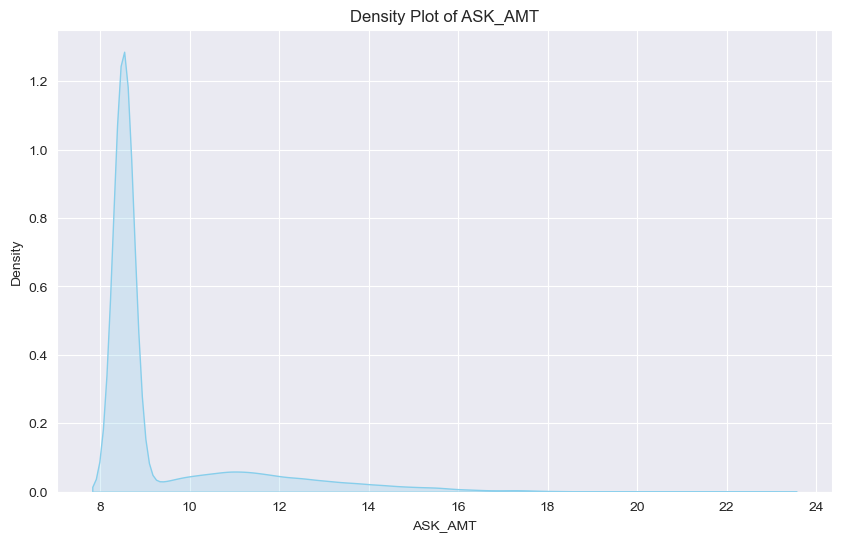

In [7]:
import seaborn as sns

# Plot the distribution of 'ASK_AMT' using a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(application_df['ASK_AMT_log'], shade=True, color='skyblue')
plt.title('Density Plot of ASK_AMT')
plt.xlabel('ASK_AMT')
plt.ylabel('Density')
plt.show()

In [8]:
#bin 'ask_mat'
bins = [0, 9.5, 12, 16, 20]  # Define your bin edges
labels = [ 'Main', 'medium','high','Outlier']  # Define bin labels
application_df['ASK_AMT_binned'] = pd.cut(application_df['ASK_AMT_log'], bins=bins, labels=labels)


income_type_counts = application_df['ASK_AMT_binned'].value_counts()
print(income_type_counts)


ASK_AMT_binned
Main       26209
medium      4395
high        3263
Outlier      392
Name: count, dtype: int64


In [9]:
application_df = application_df.drop(columns=['ASK_AMT_log', 'ASK_AMT'])

In [10]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [11]:
# Define a function to categorize the application types
def categorize_application_type(application_type):
    if application_type_counts[application_type] < 100:
        return "Other1"
    elif 100 <= application_type_counts[application_type] <= 1000:
        return "Other2"
    else:
        return application_type

# Apply the function to the 'APPLICATION_TYPE' column
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].apply(categorize_application_type)

# Verify the result
print(application_df['APPLICATION_TYPE'].value_counts())

APPLICATION_TYPE
T3        27037
Other2     2146
T4         1542
T6         1216
T5         1173
T19        1065
Other1      120
Name: count, dtype: int64


In [12]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_gt1 = classification_counts[classification_counts > 1]
print(classification_counts_gt1)


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [14]:
# Define a function to categorize the classification types
def categorize_classification(classification):
    if classification_counts[classification] < 50:
        return "Other1"
    elif 50 <= classification_counts[classification] <= 500:
        return "Other2"
    else:
        return classification

# Apply the function to the 'CLASSIFICATION' column
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].apply(categorize_classification)

# Verify the result
print(application_df['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000     17326
C2000      6074
C1200      4837
C3000      1918
C2100      1883
Other2     1093
C7000       777
Other1      391
Name: count, dtype: int64


In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, drop_first=True)

print(application_df.columns)


Index(['IS_SUCCESSFUL', 'APPLICATION_TYPE_Other2', 'APPLICATION_TYPE_T19',
       'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5',
       'APPLICATION_TYPE_T6', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000',
       'CLASSIFICATION_Other1', 'CLASSIFICATION_Other2', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'ASK_AMT_binned_medium', 'ASK_AMT_binned_high',
       'ASK_AMT_binned_Outlier'],
      dtype='object')


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
len(X_train[0])

36

## Compile, Train and Evaluate the Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


In [20]:
# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [22]:
# Store feature names (assuming X_train was originally a DataFrame)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

# Random Forest Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

rf_importance = rf_model.feature_importances_
rf_feature_importance = pd.DataFrame({'feature': feature_names, 'importance': rf_importance})
rf_feature_importance = rf_feature_importance.sort_values('importance', ascending=False)

print("Random Forest Feature Importance:")
print(rf_feature_importance)

Random Forest Feature Importance:
       feature  importance
7    feature_7    0.404624
24  feature_24    0.068881
4    feature_4    0.040642
13  feature_13    0.038978
12  feature_12    0.032196
1    feature_1    0.030127
34  feature_34    0.026740
15  feature_15    0.026620
0    feature_0    0.025558
3    feature_3    0.025298
2    feature_2    0.024204
21  feature_21    0.022147
33  feature_33    0.021322
20  feature_20    0.020157
11  feature_11    0.018649
5    feature_5    0.018346
14  feature_14    0.017122
17  feature_17    0.017038
30  feature_30    0.016502
27  feature_27    0.014421
29  feature_29    0.014187
25  feature_25    0.012319
35  feature_35    0.010237
22  feature_22    0.009413
26  feature_26    0.007961
28  feature_28    0.007359
16  feature_16    0.006229
31  feature_31    0.004881
32  feature_32    0.004424
6    feature_6    0.004282
8    feature_8    0.003028
23  feature_23    0.002482
18  feature_18    0.001966
10  feature_10    0.001259
9    feature_9    0.0

In [23]:
#explore feature 7

import numpy as np

feature_7 = X_train[:, 7]

print("Feature 7 statistics:")
print(f"Total count: {len(feature_7)}")
print(f"Count of 0s: {np.sum(feature_7 == 0)}")
print(f"Count of 1s: {np.sum(feature_7 == 1)}")
print(f"Proportion of 0s: {np.mean(feature_7 == 0):.4f}")
print(f"Proportion of 1s: {np.mean(feature_7 == 1):.4f}")

# Check correlation with target (if y_train is also binary)
correlation = np.corrcoef(feature_7, y_train)[0, 1]
print(f"\nCorrelation with target: {correlation:.4f}")

# Contingency table (if y_train is also binary)
from scipy.stats import contingency

contingency_table = contingency.crosstab(feature_7, y_train)
print("\nContingency table:")
print(contingency_table.count)


Feature 7 statistics:
Total count: 25724
Count of 0s: 11883
Count of 1s: 13841
Proportion of 0s: 0.4619
Proportion of 1s: 0.5381

Correlation with target: 0.3706

Contingency table:
[[7931 3952]
 [4104 9737]]


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from scipy.stats import uniform, randint
import h5py

In [34]:

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
nn = MLPClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Define hyperparameter search spaces
nn_params = {
    'nn__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'nn__activation': ['relu', 'tanh'],
    'nn__alpha': uniform(0.0001, 0.001),
    'nn__learning_rate': ['constant', 'adaptive'],
}

rf_params = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(5, 20),
    'rf__min_samples_split': randint(2, 11),
}

gb_params = {
    'gb__n_estimators': randint(100, 500),
    'gb__learning_rate': uniform(0.01, 0.2),
    'gb__max_depth': randint(3, 10),
}

# Create pipelines for each model
nn_pipeline = Pipeline([('scaler', StandardScaler()), ('nn', nn)])
rf_pipeline = Pipeline([('rf', rf)])
gb_pipeline = Pipeline([('gb', gb)])

# Define RandomizedSearchCV for each model
nn_search = RandomizedSearchCV(nn_pipeline, nn_params, n_iter=20, cv=3, random_state=42, n_jobs=-1)
rf_search = RandomizedSearchCV(rf_pipeline, rf_params, n_iter=20, cv=3, random_state=42, n_jobs=-1)
gb_search = RandomizedSearchCV(gb_pipeline, gb_params, n_iter=20, cv=3, random_state=42, n_jobs=-1)

# Fit each model
print("Tuning Neural Network...")
nn_search.fit(X_train, y_train)
print("Tuning Random Forest...")
rf_search.fit(X_train, y_train)
print("Tuning Gradient Boosting...")
gb_search.fit(X_train, y_train)

# Get the best models
best_nn = nn_search.best_estimator_
best_rf = rf_search.best_estimator_
best_gb = gb_search.best_estimator_

# Make predictions
nn_pred = best_nn.predict(X_test)
rf_pred = best_rf.predict(X_test)
gb_pred = best_gb.predict(X_test)

# Ensemble predictions (simple majority voting)
ensemble_pred = np.round(np.mean([nn_pred, rf_pred, gb_pred], axis=0)).astype(int)

# Print results
print("\nNeural Network Performance:")
print(classification_report(y_test, nn_pred))

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_pred))

print("\nGradient Boosting Performance:")
print(classification_report(y_test, gb_pred))

print("\nEnsemble Performance:")
print(classification_report(y_test, ensemble_pred))

# Print best hyperparameters
print("\nBest Neural Network Hyperparameters:")
print(nn_search.best_params_)

print("\nBest Random Forest Hyperparameters:")
print(rf_search.best_params_)

print("\nBest Gradient Boosting Hyperparameters:")
print(gb_search.best_params_)

# Save results to HDF5 file
with h5py.File('model_results.h5', 'w') as hf:
    
    # Save predictions
    hf.create_dataset('nn_predictions', data=nn_pred)
    hf.create_dataset('rf_predictions', data=rf_pred)
    hf.create_dataset('gb_predictions', data=gb_pred)
    hf.create_dataset('ensemble_predictions', data=ensemble_pred)
    
    # Save true labels
    hf.create_dataset('true_labels', data=y_test)
    
    # Save model performances
    performance_group = hf.create_group('performance')
    for model_name, predictions in [('Neural_Network', nn_pred), 
                                    ('Random_Forest', rf_pred), 
                                    ('Gradient_Boosting', gb_pred), 
                                    ('Ensemble', ensemble_pred)]:
        report = classification_report(y_test, predictions, output_dict=True)
        model_group = performance_group.create_group(model_name)
        for metric, values in report.items():
            if isinstance(values, dict):
                metric_group = model_group.create_group(metric)
                for k, v in values.items():
                    metric_group.attrs[k] = v
            else:
                model_group.attrs[metric] = values

    # Save best hyperparameters
    hyperparams_group = hf.create_group('best_hyperparameters')
    hyperparams_group.attrs['Neural_Network'] = str(nn_search.best_params_)
    hyperparams_group.attrs['Random_Forest'] = str(rf_search.best_params_)
    hyperparams_group.attrs['Gradient_Boosting'] = str(gb_search.best_params_)

print("Results saved to 'AlphabetSoupCharity_Optimisation_2.h5'")



Tuning Neural Network...


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/dev/lib/pyth

Tuning Random Forest...
Tuning Gradient Boosting...

Neural Network Performance:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      3196
           1       0.73      0.77      0.75      3664

    accuracy                           0.72      6860
   macro avg       0.72      0.72      0.72      6860
weighted avg       0.72      0.72      0.72      6860


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      3196
           1       0.73      0.77      0.75      3664

    accuracy                           0.72      6860
   macro avg       0.72      0.72      0.72      6860
weighted avg       0.72      0.72      0.72      6860


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      3196
           1       0.72      0.79      0.76      3664

    accuracy                           0.